# Predicting players rating

### In this project I am going to predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc.

<p> The dataset I am going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016. </p>

## About the Dataset


### The ultimate Soccer database for data analysis and machine learning
<p>The dataset comes in the form of an SQL database and contains statistics of about 25,000 football
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations,
with player names and a pair of coordinates to indicate their position on the pitch. </p>
<ul>
<li>+25,000 matches</li>
<li>+10,000 players</li>
<li>11 European Countries with their lead championship</li>
<li>Seasons 2008 to 2016</li>
<li>Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates</li>
<li>Team line up with squad formation (X, Y coordinates)</li>
<li>Betting odds from up to 10 providers</li>
<li>Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches</li>
</ul>    
<p>The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video
games. It is not just the stats that come with a new version of the game but also the weekly
updates. So for instance if a player has performed poorly over a period of time and his stats get
impacted in FIFA, you would normally see the same in the dataset. </p>

## Importing Modules

In [1]:
import sqlite3
import numpy as np
import pylab as pl
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as  sns
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

## Data Pre-Processing

In [2]:
conn = sqlite3.connect('database.sqlite') #Creating a Connection object that represents the database 
df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn) #Reading SQL query into a DataFrame

## Data Exploration

In [3]:
df.head() #Returns the first 5 rows of dataframe df

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.columns #Columns of dataframe df

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [5]:
df.describe() #The summary statistics of the dataframe df

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [6]:
df.shape #Return a tuple representing the dimensionality of the DataFrame df.

(183978, 42)

## Data Cleaning

In [7]:
df.isnull().values.any() #Check for any NA’s in the dataframe.

True

In [8]:
df1 = df.dropna() #Drop the rows where at least one element is missing.

In [9]:
df1.shape #Return a tuple representing the dimensionality of the DataFrame df1.

(180354, 42)

In [10]:
df1.columns #Columns of dataframe df1

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [11]:
df1 = df1.drop(["id", "player_fifa_api_id", "player_api_id"], axis = 1) #Dropping id, player_fifa_api_id and player_api_id columns 

In [12]:
df1.columns #Columns of dataframe df1 

Index(['date', 'overall_rating', 'potential', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [13]:
clms = list(df1.columns[1:]) #Listing the columns of dataframe df1 starting from 2nd column
print(clms) #Printing clms list 

['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']


In [14]:
len(clms) #Lenth of the clms list

38

## Data Visualization

In [22]:
df.preferred_foot.unique()

array(['right', 'left', None], dtype=object)

In [27]:
df2=df1.head(1000)

### Histogram

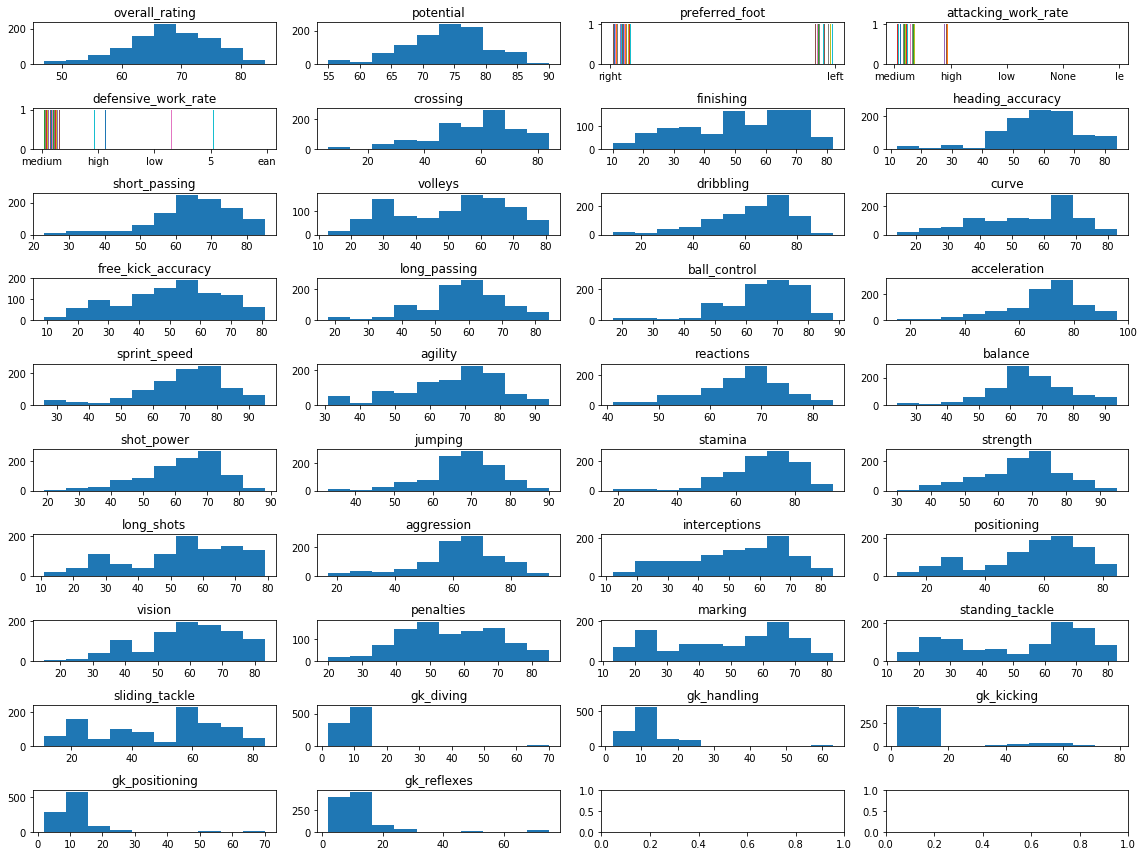

In [26]:
# colors = ['red', 'tan', 'lime']
fig, axes = plt.subplots(10, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
    if i < len(clms):
        ax.hist(df2[clms[i]])
        ax.set_title(clms[i])
plt.tight_layout()
plt.show()

### Scatter Plot

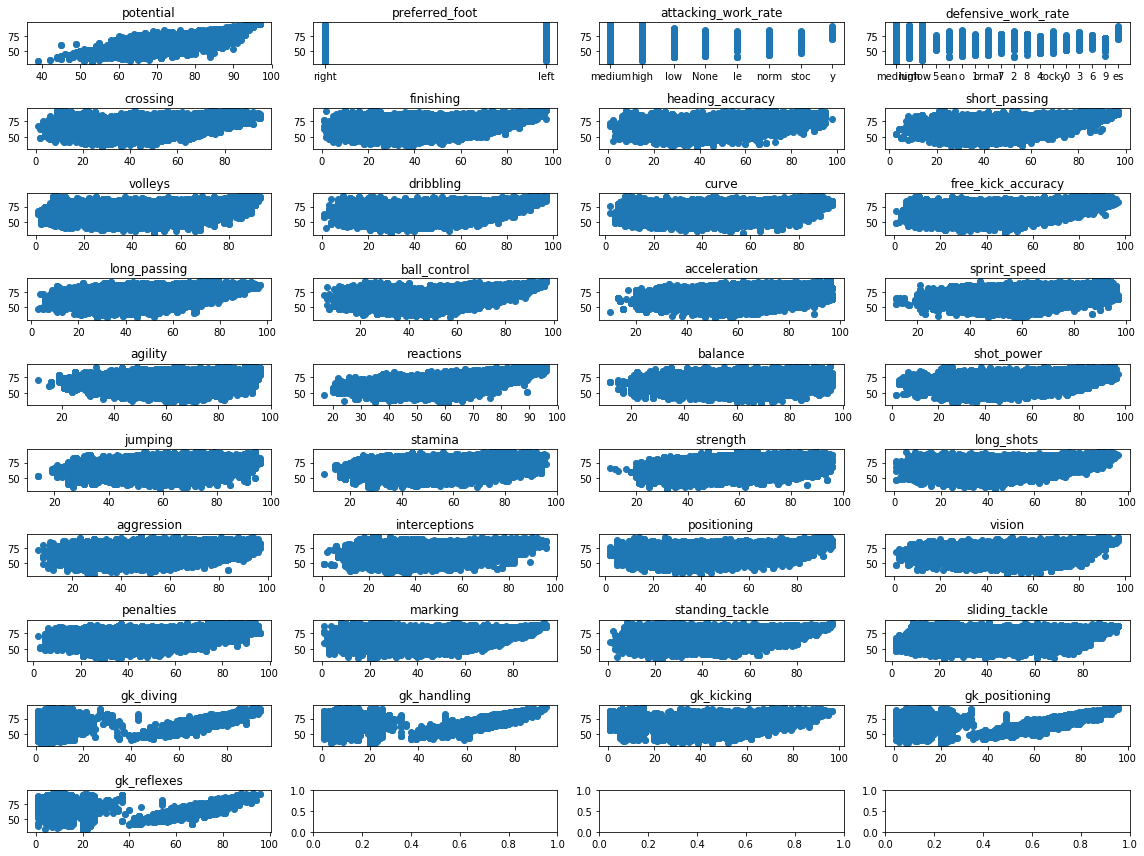

In [15]:
fig, axes = plt.subplots(10, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
    if i < len(clms)-1:
        ax.scatter(df1[clms[i+1]], df1[clms[0]])
        ax.set_title(clms[i+1])
params = {'legend.fontsize': 'small',
         'axes.labelsize': 'small',
         'axes.titlesize':'medium',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
plt.rcParams.update(params)
plt.tight_layout()
plt.show()

In [28]:
axes[0,0].hist(df1[clms[0]]) 

(array([3.3000e+01, 2.9200e+02, 2.0160e+03, 8.2530e+03, 2.8922e+04,
        5.8589e+04, 5.3453e+04, 2.3470e+04, 4.9810e+03, 3.4500e+02]),
 array([33. , 39.1, 45.2, 51.3, 57.4, 63.5, 69.6, 75.7, 81.8, 87.9, 94. ]),
 <a list of 10 Patch objects>)

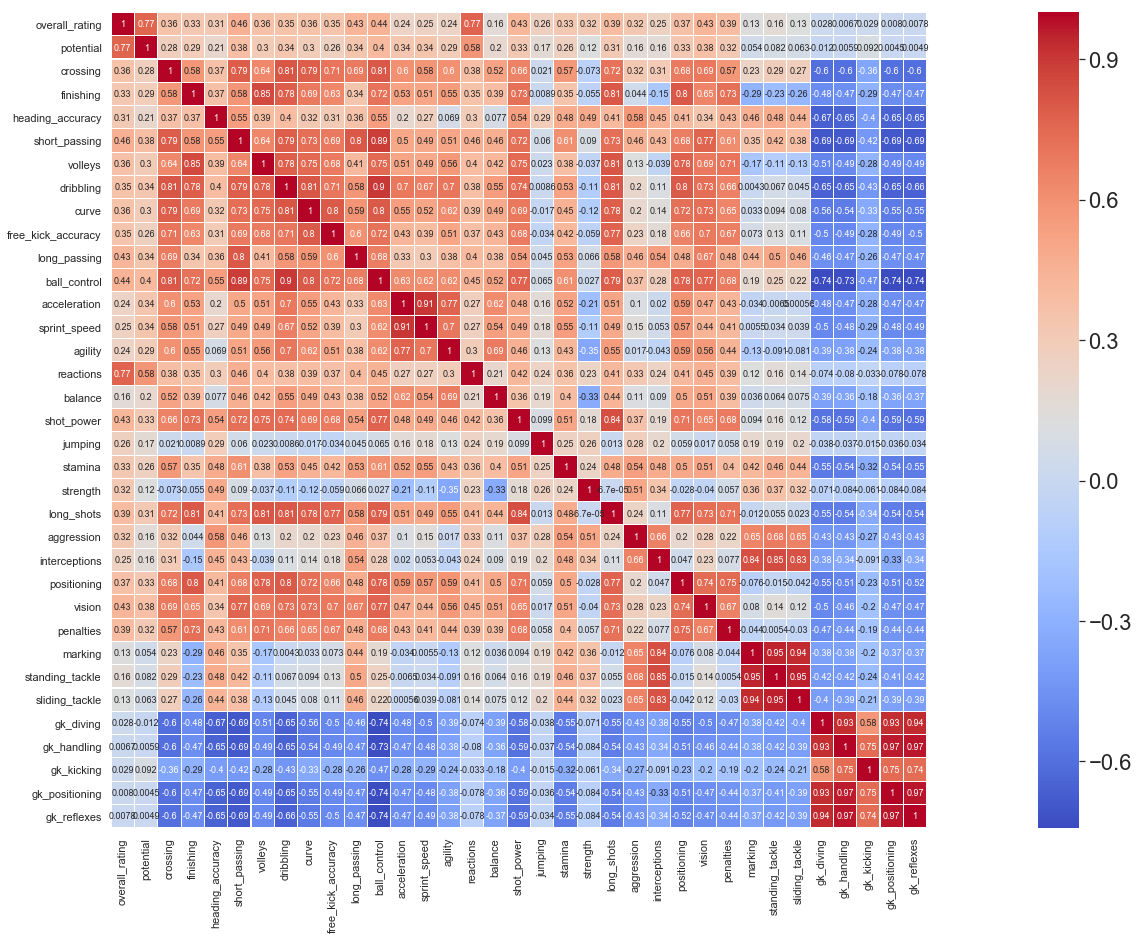

In [30]:
sns.set(style="white")
df_corr= df1[:]
corr = df_corr.dropna().corr() #Compute the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool) #Generate a mask 
# f, ax = plt.subplots(figsize=(20, 15)) #Set up the matplotlib figure
plt.subplots(figsize=(40, 15)) #Set up the matplotlib figure
ax=plt.subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True) #Generate a custom diverging colormap
sns.set(font_scale=2)
sns.heatmap(corr, mask=mask, cmap="coolwarm", square=True, linewidths=.05, ax=ax,cbar=True,annot=True,annot_kws={'size':9}) #Draw the heatmap with the mask


## Preparing Data for Linear Regression

In [31]:
df1.loc[:, "new_date"] = df1["date"].apply(pd.to_datetime) #Creating a new column new_date and changing the date time format

In [32]:
df1.loc[:, "day"] = df1["new_date"].apply(lambda x: x.day) #Creating a day column and assigning the day values of new_date column

In [33]:
df1.loc[:, "month"] = df1["new_date"].apply(lambda x: x.month) #Creating a month column and assigning the month values of new_date column

In [34]:
df1.loc[:, "year"] = df1["new_date"].apply(lambda x: x.year) #Creating a day year and assigning the year values of new_date column

In [35]:
df1["year"].unique() #Unique year values of the year column

array([2016, 2015, 2007, 2014, 2013, 2012, 2011, 2010, 2009, 2008],
      dtype=int64)

In [36]:
cat_clms =  ["preferred_foot", "attacking_work_rate", "defensive_work_rate", "year", "month", "day"] #Catagory Column List

In [37]:
df1.head() #Returns the first 5 rows of dataframe df1

,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,new_date,day,month,year
0,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,...,69.0,6.0,11.0,10.0,8.0,8.0,2016-02-18,18,2,2016
1,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,...,69.0,6.0,11.0,10.0,8.0,8.0,2015-11-19,19,11,2015
2,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,...,69.0,6.0,11.0,10.0,8.0,8.0,2015-09-21,21,9,2015
3,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,...,66.0,5.0,10.0,9.0,7.0,7.0,2015-03-20,20,3,2015
4,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,...,66.0,5.0,10.0,9.0,7.0,7.0,2007-02-22,22,2,2007


In [38]:
df1 =  df1.drop(["date", "new_date"], axis = 1) #Dropping the date and new_date columns

In [39]:
for clm in cat_clms:
    dummies = pd.get_dummies(df1[clm], prefix = clm)
    df1 = df1.join(dummies)
    df1 = df1.drop(clm, axis = 1)

In [40]:
df1.columns #Columns of dataframe df1

Index(['overall_rating', 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy',
       ...
       'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28',
       'day_29', 'day_30', 'day_31'],
      dtype='object', length=116)

In [41]:
df1.shape #Shape of the dataframe df1

(180354, 116)

## Train, Test & Split

In [42]:
#Spliting the dataset into two: target value and predictor values. 
X = df1.drop('overall_rating', axis = 1) #All features except overall_rating ( predictor values )
Y = df1['overall_rating'] #overall_rating ( target value )

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape) #Training data shape (predictor values) : 80%
print(X_test.shape) #Test data shape (predictor values) : 20%
print(Y_train.shape) #Training data shape (target values) : 80%
print(Y_test.shape) #Test data shape (target values) : 20%

(144283, 115)
(36071, 115)
(144283,)
(36071,)


## Creating and Training the Model

In [46]:
lm = LinearRegression() #Creating an instance of LinearRegression
lm.fit(X_train, Y_train) #Fitting the created instance of the LinearRegression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
#Printing intercept 
print(lm.intercept_)

-3.39936227662578


In [48]:
#Printing coefficients
print(lm.coef_)

[ 3.86424465e-01  2.43052499e-02  1.23932466e-02  7.27987316e-02
  3.22893045e-02  5.96675978e-03 -1.82727705e-02  8.10447096e-03
  1.28522030e-02  8.99033904e-03  1.26067864e-01  7.26557793e-03
  1.44847494e-02 -1.17529392e-02  1.98825944e-01  1.00051378e-02
  1.52496886e-02  1.17356107e-02  1.81796442e-04  5.25162101e-02
 -1.62253785e-02  2.06916748e-02  2.09904032e-02 -6.73404088e-03
  1.01773930e-02  1.66510469e-02  2.99012977e-02  1.94398387e-03
 -3.01926087e-02  1.27983365e-01  3.85557217e-02  2.00974394e-04
  5.57407945e-02  2.72966434e-02  7.71567229e-03 -7.71567229e-03
 -2.24302556e-01 -1.06630333e-01 -4.89516840e-01  1.21077428e+00
 -1.05639870e-01  1.23226900e-01 -4.35415418e-01  2.75038348e-02
 -4.47705710e-01  1.71784113e-01 -6.21478068e-01  4.26562337e-01
 -4.25076459e-01 -4.54770915e-01 -2.02643420e-01  5.83565329e-01
  8.78372118e-01  4.19666406e-01 -4.89516840e-01  2.75038348e-02
 -9.38751054e-02  4.17571581e-01 -2.86786613e-01  4.09015930e-01
  1.23226900e-01 -4.35415

## Predicting overall_rating using Test Data

In [49]:
Y_pred = lm.predict(X_test) #Calculating the prediction values

In [50]:
Y_pred.shape #Prediction shape from test data

(36071,)

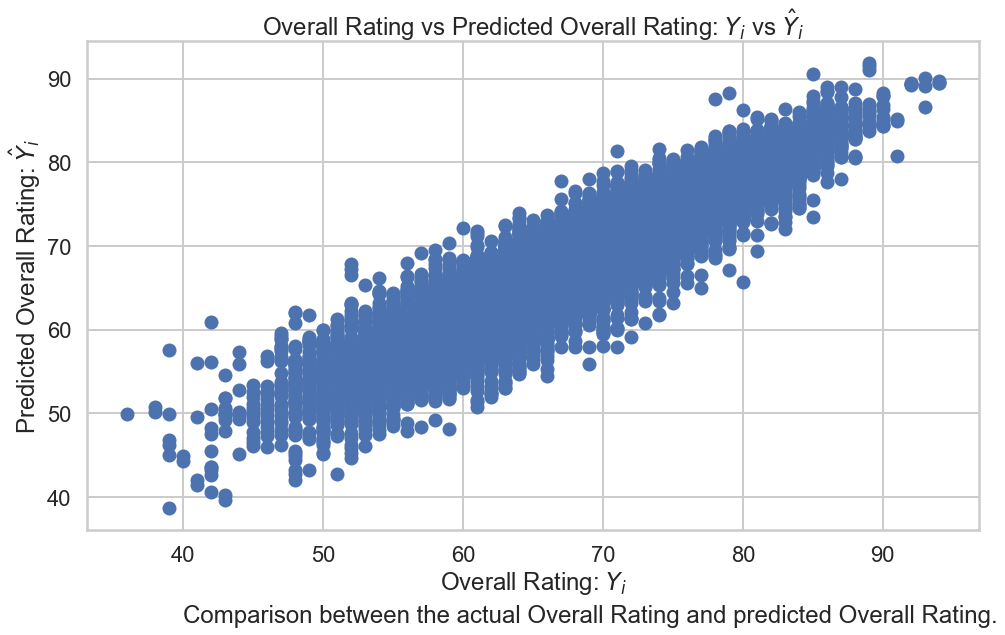

In [51]:
#To visualize the differences between actual overall rating and predicted values, creating a scatter plot.
sns.set_style("whitegrid")
sns.set_context("poster")
plt.figure(figsize=(16,9))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Overall Rating: $Y_i$")
plt.ylabel("Predicted Overall Rating: $\hat{Y}_i$")
plt.title("Overall Rating vs Predicted Overall Rating: $Y_i$ vs $\hat{Y}_i$")
plt.text(40,25, "Comparison between the actual Overall Rating and predicted Overall Rating.", ha='left')
plt.show()

C:\Users\sanraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


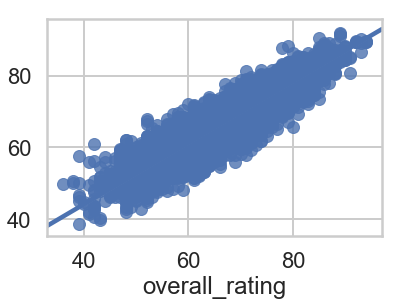

In [52]:
sns.regplot(Y_test, Y_pred, data=df1, fit_reg=True) #Plot Y_test and Y_pred for Linear Regression Model.

C:\Users\sanraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


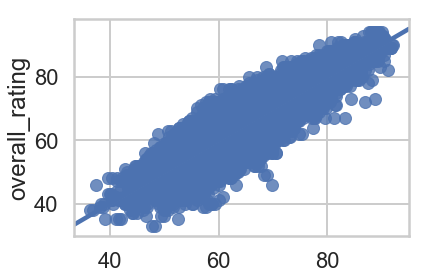

In [53]:
sns.regplot(x=lm.predict(X), y=df1['overall_rating'], data=df1, fit_reg=True) #Plot predicted and actual Overall Rating values.

## Model Evaluation Using Cross-Validation

In [54]:
#Evaluating the model using 10-fold cross-validation
scores = cross_val_score(LinearRegression(), X, Y, scoring='neg_mean_squared_error', cv=10)
scores

array([-7.44256819, -7.10106665, -7.1964293 , -7.29567788, -7.17236284,
       -7.57297055, -7.1520984 , -7.34232439, -7.48982496, -7.22300491])

In [55]:
np.sqrt(scores.mean() * -1)

2.7016352097311422

In [56]:
print("The Root Mean Square Error using cross validation for the Model is "+ str(np.sqrt(scores.mean() * -1)) +" and the Results can be further improved using feature extraction and rebuilding, training the model.")

The Root Mean Square Error using cross validation for the Model is 2.7016352097311422 and the Results can be further improved using feature extraction and rebuilding, training the model.


## Evaluating the Model Using RMSE

In [57]:
#Calculating Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred) #Mean Squared Error: To check the level of error of a model
print(mse)

7.199862251896585


In [58]:
#Calculating Root Mean Squared Error#Calcula 
rmse = mse ** 0.5 #Square root of mse (Mean Squared Error)
print(rmse)

2.6832559050333953


In [59]:
print("The Root Mean Square Error (RMSE) for the Model is "+ str(rmse) +" and the Results can be further improved using feature extraction and rebuilding, training the model.")

The Root Mean Square Error (RMSE) for the Model is 2.6832559050333953 and the Results can be further improved using feature extraction and rebuilding, training the model.
